<a href="https://colab.research.google.com/github/cherishkim42/covid/blob/master/KoreaEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mounting Google Drive into runtime
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
from scipy import stats
import math
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,11)}) #standardize sizing for seaborn plots

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# South Korea

### Questions to address:

1. How has the rate of infection changed over time?
1. How were the different regions of South Korea affected by the COVID-19 outbreak?
1. What percentage of total confirmed is made up by Shincheonji?
1. Demographically, who is the most vulnerable?
1. What is the fatality rate?

_Data courtesy of Korea Centers for Disease Control and Prevention (KCDC). Datasets found here ( https://www.kaggle.com/kimjihoo/coronavirusdataset/data ), although the collection is no longer being updated/maintained._

### How has the rate of infection changed over time?

In [2]:
import pandas as pd
time = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/korea/Time.csv")
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [3]:
time.dtypes

date         object
time          int64
test          int64
negative      int64
confirmed     int64
released      int64
deceased      int64
dtype: object

In [4]:
time['date'] = pd.to_datetime(time['date'])
time.dtypes

date         datetime64[ns]
time                  int64
test                  int64
negative              int64
confirmed             int64
released              int64
deceased              int64
dtype: object

In [5]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


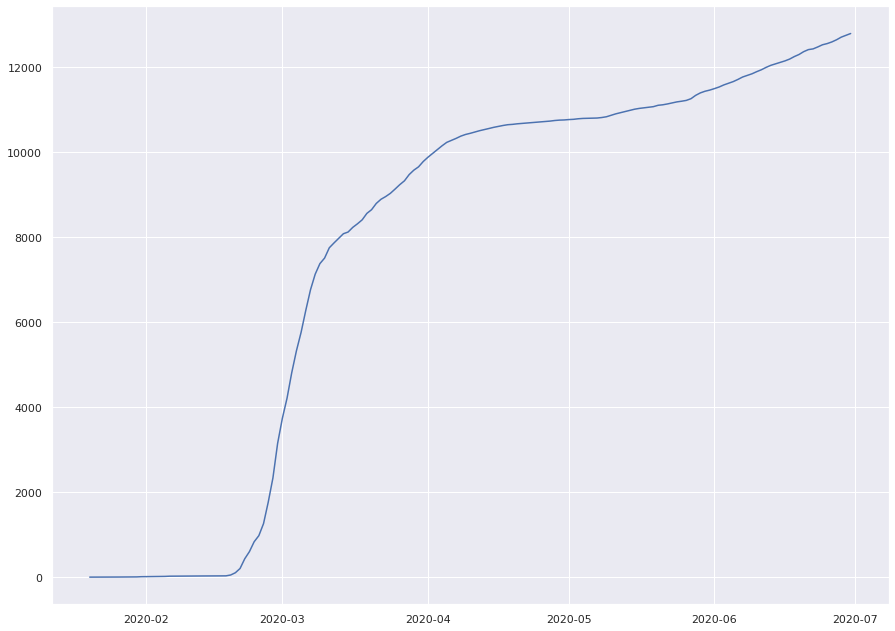

In [8]:
plt.plot(time['date'], time['confirmed'])
plt.show()

After an initial spike of cases in March, South Korea successfully managed to "flatten the curve" by the start of April. The curve stayed mostly flattened until between May and July, at which point we begin to see an increase in cases once more in the visual above.

### How were the different regions of South Korea affected by the COVID-19 outbreak?

In [11]:
case = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/korea/Case.csv")
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [12]:
case['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [19]:
case['confirmed'].sum()

11395

In [13]:
seoul = case[(case['province'] == 'Seoul')]
busan = case[(case['province'] == 'Busan')]
daegu = case[(case['province'] == 'Daegu')]
gwangju = case[(case['province'] == 'Gwangju')]
incheon = case[(case['province'] == 'Incheon')]
daejeon = case[(case['province'] == 'Daejeon')]
ulsan = case[(case['province'] == 'Ulsan')]
sejong = case[(case['province'] == 'Sejong')]
gyeonggido = case[(case['province'] == 'Gyeonggi-do')]
gangwondo = case[(case['province'] == 'Gangwon-do')]
chungcheongbukdo = case[(case['province'] == 'Chungcheongbuk-do')]
chungcheongnamdo = case[(case['province'] == 'Chungcheongnam-do')]
jeollabukdo = case[(case['province'] == 'Jeollabuk-do')]
jeollanamdo = case[(case['province'] == 'Jeollanam-do')]
gyeongsangbukdo = case[(case['province'] == 'Gyeongsangbuk-do')]
gyeongsangnamdo = case[(case['province'] == 'Gyeongsangnam-do')]
jejudo = case[(case['province'] == 'Jeju-do')]

In [14]:
print("BREAKDOWN:")
    
print("Seoul: " + str(seoul["confirmed"].sum()))
print("Busan: " + str(busan["confirmed"].sum()))
print("Daegu: " + str(daegu["confirmed"].sum()))
print("Gwangju: " + str(gwangju["confirmed"].sum()))
print("Incheon: " + str(incheon["confirmed"].sum()))
print("Daejeon: " + str(daejeon["confirmed"].sum()))
print("Ulsan: " + str(ulsan["confirmed"].sum()))
print("Sejong: " + str(sejong["confirmed"].sum()))
print("Gyeonggi-do: " + str(gyeonggido["confirmed"].sum()))
print("Gangwon-do: " + str(gangwondo["confirmed"].sum()))
print("Chungcheongbuk-do: " + str(chungcheongbukdo["confirmed"].sum()))
print("Chungcheongnam-do: " + str(chungcheongnamdo["confirmed"].sum()))
print("Jeollabuk-do: " + str(jeollabukdo["confirmed"].sum()))
print("Jeollanam-do: " + str(jeollanamdo["confirmed"].sum()))
print("Gyeongsangbuk-do: " + str(gyeongsangbukdo["confirmed"].sum()))
print("Gyeongsangnam-do: " + str(gyeongsangnamdo["confirmed"].sum()))
print("Jeju-do: " + str(jejudo["confirmed"].sum()))


BREAKDOWN:
Seoul: 1280
Busan: 156
Daegu: 6680
Gwangju: 43
Incheon: 202
Daejeon: 131
Ulsan: 51
Sejong: 49
Gyeonggi-do: 1000
Gangwon-do: 62
Chungcheongbuk-do: 60
Chungcheongnam-do: 158
Jeollabuk-do: 23
Jeollanam-do: 25
Gyeongsangbuk-do: 1324
Gyeongsangnam-do: 132
Jeju-do: 19


In [20]:
print("Seoul: ", 1280/11395)
print("Daegu: ", 6680/11395)
print("Gyeonggi-do: ", 1000/11395)
print("Gyeongsangbuk-do: ", 1324/11395)

Seoul:  0.11232996928477403
Daegu:  0.5862220272049145
Gyeonggi-do:  0.0877577885037297
Gyeongsangbuk-do:  0.11619131197893813


In [21]:
print(19/11395)

0.0016673979815708645


The four hardest-hit parts of South Korea were as follows:

1. **Daegu** at **58.62%** of all infections;
1. **Northern Gyeongsangbuk Province** at **11.62%**;
1. **Seoul** at **11.23%**; and
1. **Gyeonggi-do** at **8.78%**.

However, **Jeju-do** seems to be luckily just chilling at **0.17%** of all national infections.

### What percentage of total confirmed is made up by Shincheonji?

In [15]:
cult = case[(case['infection_case'] == 'Shincheonji Church')]
cult.tail()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
123,4000004,Chungcheongbuk-do,from other city,True,Shincheonji Church,6,-,-
137,5000003,Jeollabuk-do,from other city,True,Shincheonji Church,1,-,-
141,5100002,Jeollanam-do,from other city,True,Shincheonji Church,1,-,-
145,6000001,Gyeongsangbuk-do,from other city,True,Shincheonji Church,566,-,-
158,6100001,Gyeongsangnam-do,from other city,True,Shincheonji Church,32,-,-


In [16]:
cult['confirmed'].sum()

5213

In [18]:
print(5213/8059)

0.6468544484427349


### Demographically, who is the most vulnerable?

In [35]:
time_age = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/korea/TimeAge.csv")
time_age.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [44]:
time_age.describe()

,time,confirmed,deceased
count,1089.0,1089.000000,1089.000000
mean,0.0,1158.129477,23.419651
std,0.0,822.619497,37.387911
min,0.0,32.000000,0.000000
25%,0.0,530.000000,0.000000
50%,0.0,1052.000000,3.000000
75%,0.0,1537.000000,35.000000
max,0.0,3362.000000,139.000000


In [37]:
time_age['age'].unique()

array(['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'],
      dtype=object)

In [45]:
time_age['confirmed'].sum()

1261203

In [38]:
kids = time_age[(time_age['age'] == '0s')]
kids.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
9,2020-03-03,0,0s,34,0
18,2020-03-04,0,0s,34,0
27,2020-03-05,0,0s,38,0
36,2020-03-06,0,0s,45,0


In [48]:
print("kids: ", kids['confirmed'].sum())

kids:  16107


In [42]:
teens = time_age[(time_age['age'] == '10s')]
twenties = time_age[(time_age['age'] == '20s')]
thirties = time_age[(time_age['age'] == '30s')]
forties = time_age[(time_age['age'] == '40s')]
fifties = time_age[(time_age['age'] == '50s')]
sixties = time_age[(time_age['age'] == '60s')]
seventies = time_age[(time_age['age'] == '70s')]
eighties = time_age[(time_age['age'] == '80s')]

In [53]:
print("infection:")
print("kids: ", kids['confirmed'].sum())
print("teens: ", teens['confirmed'].sum())
print("20s: ", twenties['confirmed'].sum())
print("30s: ", thirties['confirmed'].sum())
print("40s: ", forties['confirmed'].sum())
print("50s: ", fifties['confirmed'].sum())
print("60s: ", sixties['confirmed'].sum())
print("70s: ", seventies['confirmed'].sum())
print("80s: ", eighties['confirmed'].sum())

infection:
kids:  16107
teens:  68752
20s:  345827
30s:  137539
40s:  168250
50s:  230030
60s:  158505
70s:  82107
80s:  54086


In [54]:
print("fatality:")
print("kids: ", kids['deceased'].sum())
print("teens: ", teens['deceased'].sum())
print("20s: ", twenties['deceased'].sum())
print("30s: ", thirties['deceased'].sum())
print("40s: ", forties['deceased'].sum())
print("50s: ", fifties['deceased'].sum())
print("60s: ", sixties['deceased'].sum())
print("70s: ", seventies['deceased'].sum())
print("80s: ", eighties['deceased'].sum())

fatality:
kids:  0
teens:  0
20s:  0
30s:  194
40s:  295
50s:  1537
60s:  3743
70s:  7599
80s:  12136


In terms of **age**:
* The most **infected** are those in their **20s** and their **50s**.
* The most **prone to fatality** are those in their **70s** and their **80s**.

In [34]:
time_sex = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/korea/TimeGender.csv")
time_sex

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151


In [55]:
males = time_sex[(time_sex['sex'] == 'male')]
females = time_sex[(time_sex['sex'] == 'female')]
print("infections: ")
print("men: ", males['confirmed'].sum())
print("women: ", females['confirmed'].sum())
print("fatalities: ")
print("men: ", males['deceased'].sum())
print("women: ", females['deceased'].sum())

infections: 
men:  513727
women:  747467
fatalities: 
men:  13484
women:  12019


In terms of **gender**:
* **Women** appear more frequently among the infected; however,
* **Men** are represented more frequently among fatalities.

### What is the fatality rate?

In [57]:
print((513727+747467)/(13484+12019))

49.45277026232208


The **overall** fatality rate is **49.45%**